In [87]:
import numpy as np
from sklearn.datasets import make_classification
from cop_kmeans import CopKMeans
import matplotlib.pyplot as plt

from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score

In [78]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=2611)
print(X[:5], y[:5])

[[-1.02247247  0.96386078]
 [ 0.64049706  3.32403435]
 [-0.60449381 -0.72137988]
 [-0.52595147  0.40157841]
 [-0.77634698  0.7604021 ]] [1 2 0 0 1]


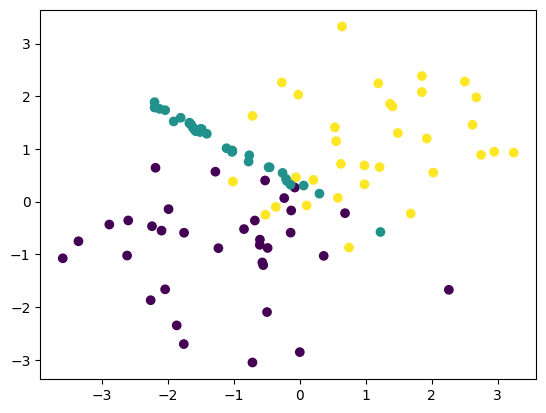

In [79]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

## Without constraints

In [80]:
model = CopKMeans(3, 200)

model.fit(X, [], [])

prediction = model.predict(X)

mi = mutual_info_score(y, prediction)
nmi = normalized_mutual_info_score(y, prediction)
ami = adjusted_mutual_info_score(y, prediction)

print(f"{mi = }, {nmi = }, {ami = }")

Itération 0
Itération 50
Itération 100
Itération 150
mi = 0.380499703816348, nmi = 0.37541113790339914, ami = 0.3622721712191475


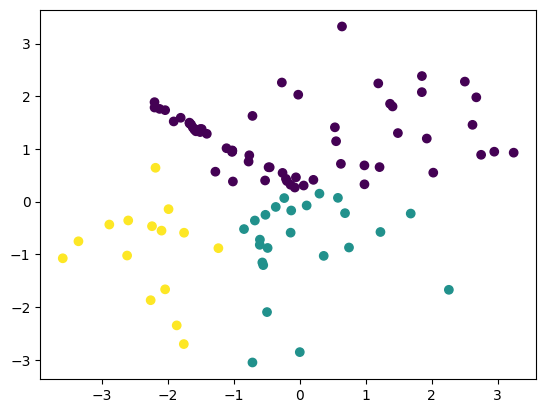

In [81]:
plt.scatter(X[:,0], X[:,1], c=prediction)
plt.show()

## With constraints

In [82]:
# Computing all possible constraints
ml = []
cl = []

for i, pt1 in enumerate(y):
    for j, pt2 in enumerate(y[i+1:]):
        if pt1 == pt2 :
            ml.append((i, j+i+1))
        else:
            cl.append((i, j+i+1))

print(ml)
print(cl)
print(len(ml), len(cl))

[(0, 4), (0, 7), (0, 8), (0, 9), (0, 18), (0, 19), (0, 22), (0, 27), (0, 29), (0, 31), (0, 41), (0, 43), (0, 47), (0, 49), (0, 52), (0, 58), (0, 62), (0, 64), (0, 65), (0, 67), (0, 69), (0, 71), (0, 75), (0, 76), (0, 78), (0, 80), (0, 81), (0, 82), (0, 83), (0, 86), (0, 91), (0, 99), (1, 6), (1, 10), (1, 12), (1, 15), (1, 16), (1, 17), (1, 20), (1, 26), (1, 33), (1, 34), (1, 36), (1, 39), (1, 42), (1, 45), (1, 48), (1, 53), (1, 54), (1, 56), (1, 59), (1, 66), (1, 70), (1, 73), (1, 74), (1, 77), (1, 89), (1, 92), (1, 93), (1, 94), (1, 95), (1, 96), (1, 97), (1, 98), (2, 3), (2, 5), (2, 11), (2, 13), (2, 14), (2, 21), (2, 23), (2, 24), (2, 25), (2, 28), (2, 30), (2, 32), (2, 35), (2, 37), (2, 38), (2, 40), (2, 44), (2, 46), (2, 50), (2, 51), (2, 55), (2, 57), (2, 60), (2, 61), (2, 63), (2, 68), (2, 72), (2, 79), (2, 84), (2, 85), (2, 87), (2, 88), (2, 90), (3, 5), (3, 11), (3, 13), (3, 14), (3, 21), (3, 23), (3, 24), (3, 25), (3, 28), (3, 30), (3, 32), (3, 35), (3, 37), (3, 38), (3, 40),

In [83]:
# Sampling 10% of ml and 10% of cl
ml, cl = np.array(ml), np.array(cl)
ml_subset = ml[np.random.choice(len(ml), int(0.1*len(ml)))]
cl_subset = cl[np.random.choice(len(cl), int(0.1*len(cl)))]

ml_subset = [tuple(l) for l in ml_subset]
cl_subset = [tuple(l) for l in cl_subset]
print(len(ml_subset))

161


In [84]:
# from active_semi_clustering.active.pairwise_constraints import ExampleOracle, ExploreConsolidate, MinMax

# oracle = ExampleOracle(y, max_queries_cnt=100)

# active_learner = MinMax(n_clusters=3)
# active_learner.fit(X, oracle=oracle)
# pairwise_constraints = active_learner.pairwise_constraints_

# print(pairwise_constraints)
# print(len(pairwise_constraints[0]), len(pairwise_constraints[1]))

In [85]:
model = CopKMeans(3, 200)

# model.fit(X, pairwise_constraints[0], pairwise_constraints[1])
model.fit(X, ml_subset, cl_subset)

prediction = model.predict(X)

mi = mutual_info_score(y, prediction)
nmi = normalized_mutual_info_score(y, prediction)
ami = adjusted_mutual_info_score(y, prediction)

print(f"{mi = }, {nmi = }, {ami = }")

Itération 0
Itération 50
Itération 100
Itération 150
mi = 0.5379792084905198, nmi = 0.4913055467918576, ami = 0.4815646980164619


# Already implemented version

In [86]:
from active_semi_clustering.semi_supervised.pairwise_constraints import COPKMeans

model = COPKMeans(3, 200)

model.fit(X, ml_subset, cl_subset)

mi = mutual_info_score(y, prediction)
nmi = normalized_mutual_info_score(y, prediction)
ami = adjusted_mutual_info_score(y, prediction)

print(f"{mi = }, {nmi = }, {ami = }")

EmptyClustersException: 